# Code to create bargraphs of energy flux and time for LAMP launch 
Written by Jodie McLennan with code adapted from semeter-inversion-statistics-lamp.ipynb, December 2022

In [1]:
# Import needed libraries

from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MultipleLocator
import numpy as np
import os
import pickle
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
from scipy.integrate import quad
import scipy.signal as signal
import scipy.stats as stats

In [2]:
# Start by defining the directories where the data is stored
proj_dir = ('/media/sf_semeter-inversion/')#LAMP_Data_saved/')

In [3]:
# Read in pickle file with combined energy analysis
alpha = 'vickrey'   # 'gledhill','osepian','vickrey'
with open(proj_dir + #'data/pfisr-data/statistics/'
          'pa_inversion_results_2022-03-05_'+alpha+'.pickle',
          'rb') as handle:
    pa_inversion_results = pickle.load(handle)

    
times = list(pa_inversion_results.keys())
low_energy = [pa_inversion_results[t]['low_30keV'] for t in times]
high_energy = [pa_inversion_results[t]['high_30keV'] for t in times]
higher_energy = [pa_inversion_results[t]['high_50keV'] for t in times]

print(str(handle)[-18:-9])

5_vickrey


In [13]:
# Find non valid times
skips=0
for n, time in enumerate(times):
    
    # Only include good fits
    converged = pa_inversion_results[time]['converged']
    chi2 = pa_inversion_results[time]['chi2']
    reduced_chi2 = chi2/pa_inversion_results[time]['dof']
    
    
    # If fit didn't converge, skip
    if converged == False:
        low_energy[n] = 0
        high_energy[n] = 0
        higher_energy[n] = 0
        #print('skipped')
        skips +=1
    
    # If chi2 not in reasonable bounds skip
    if (reduced_chi2 < 0) or (reduced_chi2 > 3):
        low_energy[n] = 0
        high_energy[n] = 0
        higher_energy[n] = 0
        #print('skipped')
        skips +=1
print(skips)
print('skip percentage of data: '+str(skips/n))


285
skip percentage of data: 0.6737588652482269


424

In [14]:
total_energy = np.array(low_energy) + np.array(high_energy) # less than or equal to 30 keV + greater than 30 keV
#total_energy = np.array(total_energy)

low_aurora = []
high_aurora = []
higher_aurora = []
times_aurora =[]
limit = 0
skips = 0
for n, t in enumerate(times):
    if total_energy[n] < limit:
        skips +=1
        print('skipped',times[n])
        continue
    else:
#         low_aroura.append(low_energy[n]/total_energy[n])
#         high_aroura.append(high_energy[n]/total_energy[n])
#         higher_aroura.append(higher_energy[n]/total_energy[n])
        times_aurora.append(times[n])
        low_aurora.append(low_energy[n])
        high_aurora.append(high_energy[n])
        higher_aurora.append(higher_energy[n])
        
print(skips)
# maybe need to bin    

0


In [6]:
# bin energies per time period
tosec = lambda x: x.hour*3600+x.minute*60+x.second
bintime = 20*60 #secs
maxtime = times_aurora[-1].hour*3600+times_aurora[-1].minute*60+times_aurora[-1].second
maxtime = tosec(times_aurora[-1])
i=1
initialsec = tosec(times_aurora[0])
multiples = (maxtime-initialsec)/bintime
binned_low = []
binned_high =[]
sumup_low=0
sumup_high=0
sumuptime = 0
label2 = str(times_aurora[0].hour)+':'+str(times_aurora[0].minute)+':'+str(times_aurora[0].second)
labels =[]
for i in np.arange(0,np.ceil(multiples)):
    m=0
    sumup_low=0
    sumup_high=0
    label1=label2
    for n in np.arange(len(times_aurora)):
        secs = tosec(times_aurora[n])
        if secs>initialsec and secs<bintime+initialsec:
            sumuptime = sumuptime + tosec(times_aurora[n])
            sumup_low = low_aurora[n]+sumup_low
            sumup_high = high_aurora[n]+sumup_high
            label2 = str(times_aurora[n].hour)+':'+str(times_aurora[n].minute)+':'+str(times_aurora[n].second)
            m +=1
        elif secs< initialsec+ bintime*(i+1) and secs> i*bintime+initialsec:
            sumuptime = sumuptime + tosec(times_aurora[n])
            sumup_low = low_aurora[n]+sumup_low
            sumup_high = high_aurora[n]+sumup_high
            label2 = str(times_aurora[n].hour)+':'+str(times_aurora[n].minute)+':'+str(times_aurora[n].second)
            m +=1
#         else:
#             binned.append(sumup/bintime)
#             sumup = 0
        
#     binned_low.append(sumup_low/m)
#     binned_high.append(sumup_high/m)
# Dont want to average the energy fluxes, want to sum them
    binned_low.append(sumup_low)
    binned_high.append(sumup_high)
    labels.append(label1+'-'+label2)

    
    


In [7]:
print(multiples)
print(len(binned_low))
x = np.arange(1,len(binned_low))
print(np.array(x).shape)
np.array(binned_low).shape

xlabels =[]
for i in np.arange(0,np.ceil(multiples)):
    label1 = int(bintime*i/60)
    label2 = int(bintime*(i+1)/60)
    xlabel = str(label1)+'-'+str(label2)
    xlabels.append(xlabel)
print(labels)

23.945833333333333
24
(23,)
['8:0:59-8:19:59', '8:19:59-8:37:56', '8:37:56-9:0:9', '9:0:9-9:20:13', '9:20:13-9:39:13', '9:39:13-10:0:47', '10:0:47-10:20:51', '10:20:51-10:40:55', '10:40:55-11:0:8', '11:0:8-11:20:11', '11:20:11-11:40:15', '11:40:15-12:0:11', '12:0:11-12:20:15', '12:20:15-12:40:19', '12:40:19-13:0:22', '13:0:22-13:20:26', '13:20:26-13:40:30', '13:40:30-14:0:34', '14:0:34-14:20:38', '14:20:38-14:40:42', '14:40:42-15:0:45', '15:0:45-15:20:49', '15:20:49-15:40:53', '15:40:53-15:59:54']


[nan nan nan nan nan  2. nan 11.  9. 37. 49. 50. 49. 54. 33. 56. 75. 75.
 37. 25. 60. 46. 14. nan]


/tmp/ipykernel_4054/3925219409.py:25: RuntimeWarning: invalid value encountered in true_divide
  high_percentage = np.round(binned_high/binned_total*100)


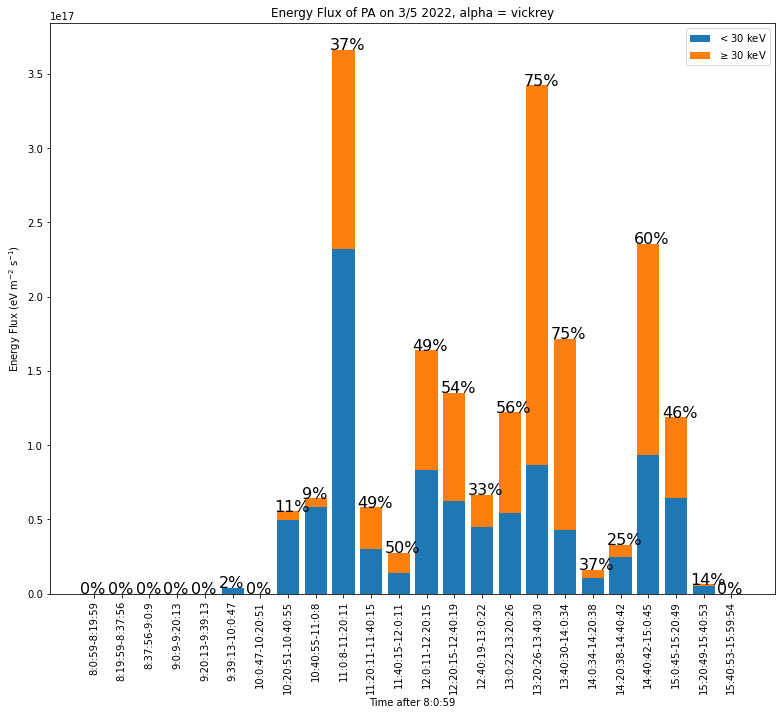

In [8]:
# plot bar graph 

width = 0.1
# fig = plt.subplots(figsize =(10, 7))

# p1 = plt.bar(times_aurora,low_aurora,color='b')#,width)
# p2 = plt.bar(times_aurora,high_aurora,bottom=low_aurora,color='r')#,width=width)
# #p3 = plt.bar(times,higher_energy,width)

# plt.title('Energy Flux of PA on '+str(times[0].month)+' '+str(times[0].day)+' '+str(times[0].year))
# plt.ylabel('Energy Flux')
# plt.xlabel('Time')
# plt.legend((p1[0], p2[0]), ('$< 30$ keV', '$\geq 30$ keV'))


# binned
x = np.arange(0,len(binned_low))
fig, ax = plt.subplots(figsize =(13, 10.5))

binned_low = np.array(binned_low)
binned_high = np.array(binned_high)
x = np.array(x)

binned_total = binned_low+binned_high
high_percentage = np.round(binned_high/binned_total*100)
print(high_percentage)
high_percentage=np.nan_to_num(high_percentage, nan=0.0)

p1 = plt.bar(x,binned_low)#,width)
p2 = plt.bar(x,binned_high,bottom=binned_low)#,width=width)
#p3 = plt.bar(times,higher_energy,width)

# add percentage numbers:
for i in np.arange(len(binned_total)):
    plt.text(x[i]-.5,binned_total[i], str(int(high_percentage[i]))+'%', fontsize = 16, color = 'k')



plt.ylabel('Energy Flux (eV m$^{-2}$ s$^{-1}$)')
plt.title('Energy Flux of PA on '+str(times[0].month)+'/'+str(times[0].day)+' '+str(times[0].year)+', alpha = '+alpha)
plt.xlabel('Time after '+str(times_aurora[0].hour)+':'+str(times_aurora[0].minute)+':'+str(times_aurora[0].second))
#plt.xticks(x,xlabels,rotation =45)
plt.xticks(x,labels,rotation =90)
plt.legend((p1[0], p2[0]), ('$< 30$ keV', '$\geq 30$ keV'))

#plt.savefig(proj_dir + '/energyflux_2022_03_05_bargraph_'+alpha+'_alltimes.jpg', dpi=200)

# # Plot times on x axis nicely
# time_locator = mdates.MinuteLocator(byminute=[0],
#                                     interval = 1)
# minor_time_locator = mdates.MinuteLocator(byminute=[30])
# ax.xaxis.set_minor_locator(minor_time_locator)
# h_fmt = mdates.DateFormatter('%H:%M')
# ax.xaxis.set_major_locator(time_locator)
# ax.xaxis.set_major_formatter(h_fmt)
# ax.tick_params(labelsize=12)

# ax.tick_params(axis='x', which='major', labelsize=14)
# ax.tick_params(axis='y', which='major', labelsize=14)


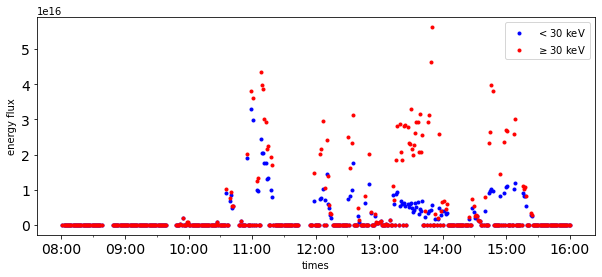

In [9]:
# plot simply
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(times_aurora,low_aurora,'b.',label='$<30$ keV')
plt.plot(times_aurora,np.array(high_aurora)+np.array(low_aurora),'r.',label='$\geq 30$ keV')
plt.xlabel('times')
plt.ylabel('energy flux')
plt.legend()

# Plot times on x axis nicely
time_locator = mdates.MinuteLocator(byminute=[0],
                                    interval = 1)
minor_time_locator = mdates.MinuteLocator(byminute=[30])
ax.xaxis.set_minor_locator(minor_time_locator)
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(time_locator)
ax.xaxis.set_major_formatter(h_fmt)
ax.tick_params(labelsize=12)

ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)

Text(0.5, 1.0, 'Energy flux in histogram')

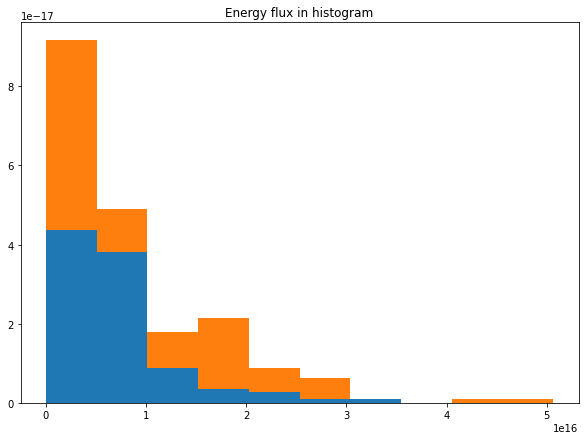

In [12]:
# plotting histogram
combined_fluxes = [low_aurora,high_aurora]
n_bins = 10
ax = plt.subplots(figsize =(10, 7))
plt.hist(combined_fluxes, n_bins, density=True, histtype='bar', stacked=True)
plt.title('Energy flux in histogram')


In [13]:
total_energy = np.array(low_energy) + np.array(high_energy)# less than or equal to 30 keV + greater than 30 keV
print(total_energy.shape)

(424,)


In [20]:
print(times[0:4])
np.array(times[0:2])
times[n].minute

print(x)

[datetime.datetime(2022, 3, 5, 8, 0, 59), datetime.datetime(2022, 3, 5, 8, 2, 2), datetime.datetime(2022, 3, 5, 8, 3, 5), datetime.datetime(2022, 3, 5, 8, 4, 9)]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [15]:
tosec = lambda x: x.hour*3600+x.minute*60+x.second

In [16]:
tosec(times_aurora[-1])

55439